# Task 1: Feature Selection Schemes

In this assignment you will understand Feature selection techniques

###Forward Selection: 
Forward selection is an iterative method in which we start with having no feature in the model. In each iteration, we keep adding the feature which best improves our model till an addition of a new variable does not improve the performance of the model.

###Backward Elimination: 
In backward elimination, we start with all the features and removes the least significant feature at each iteration which improves the performance of the model. We repeat this until no improvement is observed on removal of features.

###Recursive Feature elimination: 
It is a greedy optimization algorithm which aims to find the best performing feature subset. It repeatedly creates models and keeps aside the best or the worst performing feature at each iteration. It constructs the next model with the left features until all the features are exhausted. It then ranks the features based on the order of their elimination.

##Dataset
The dataset is available at "data/bank-full.csv" in the respective challenge's repo.
The dataset can be obtained from:
https://www.kaggle.com/vinicius150987/bank-full-machine-learning

#Features (X)
##Input variables:
# bank client data:
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8. contact: contact communication type (categorical: 'cellular','telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16. emp.var.rate: employment variation rate. quarterly indicator (numeric)
17. cons.price.idx: consumer price index. monthly indicator (numeric)
18. cons.conf.idx: consumer confidence index. monthly indicator (numeric)
19. euribor3m: euribor 3 month rate. daily indicator (numeric)
20. nr.employed: number of employees. quarterly indicator (numeric)

##Output variable (desired target):
21. y. has the client subscribed a term deposit? (binary: 'yes','no')

#### Objective
- To apply different feature selection approaches such as Forward Selection, Backward Elimination and recursive feature elimination for feature selection in Logistic Regression Algorithm.


#### Tasks
- Download and load the data (csv file)
- Process the data 
- Split the dataset into 70% for training and rest 30% for testing (sklearn.model_selection.train_test_split function)
- Train Logistic Regression
- Apply feature selection techniques
- Train the models on the feature reduced datasets
- Compare their accuracies and print feature subset

#### Further Fun
- Perform feature selection with other schemes in the Sklearn: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection|

#### Helpful links
- pd.get_dummies() and One Hot Encoding: https://queirozf.com/entries/one-hot-encoding-a-feature-on-a-pandas-dataframe-an-example
- Feature Scaling: https://scikit-learn.org/stable/modules/preprocessing.html
- Train-test splitting: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
- Feature selection in ML: https://machinelearningmastery.com/feature-selection-machine-learning-python/
- Feature selection in sklearn: https://scikit-learn.org/stable/modules/feature_selection.html
- Use slack for doubts: https://join.slack.com/t/deepconnectai/shared_invite/zt-givlfnf6-~cn3SQ43k0BGDrG9_YOn4g




In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from sklearn import preprocessing

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
banking =  pd.read_csv("/content/bank-full.csv")

In [3]:
banking.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [4]:
banking.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [5]:

banking.head(6)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no


In [6]:
banking.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
banking.shape

(45211, 17)

In [8]:
banking.rename(columns={"y":"Action"},inplace = True)

In [9]:
banking.Action.value_counts()

no     39922
yes     5289
Name: Action, dtype: int64

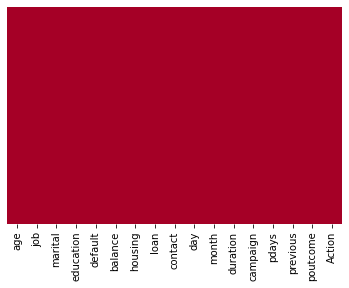

In [10]:
sns.heatmap(banking.isnull(),yticklabels = False, cbar = False , cmap ='RdYlGn')

In [11]:
new_data =  banking.select_dtypes(include='object')

In [12]:

#checking the number of unique categories in each column
for i in new_data.columns:
  print(i,';',len(set(i)),'labels')

job ; 3 labels
marital ; 6 labels
education ; 9 labels
default ; 7 labels
housing ; 7 labels
loan ; 4 labels
contact ; 5 labels
month ; 5 labels
poutcome ; 7 labels
Action ; 6 labels


In [13]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
new_data_encoded = new_data.apply(lb.fit_transform)
new_data_nonobject = banking.select_dtypes(exclude = ["object"])
banking1 = pd.concat([new_data_nonobject,new_data_encoded], axis = 1)

In [14]:
banking1.head()

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,Action
0,58,2143,5,261,1,-1,0,4,1,2,0,1,0,2,8,3,0
1,44,29,5,151,1,-1,0,9,2,1,0,1,0,2,8,3,0
2,33,2,5,76,1,-1,0,2,1,1,0,1,1,2,8,3,0
3,47,1506,5,92,1,-1,0,1,1,3,0,1,0,2,8,3,0
4,33,1,5,198,1,-1,0,11,2,3,0,0,0,2,8,3,0


In [15]:
banking1.shape

(45211, 17)

# K Best Features

In [16]:
from sklearn.feature_selection import SelectKBest
from scipy.stats import chi2 
from sklearn.feature_selection import f_classif

In [17]:
X = banking1.iloc[:,0:16]
y = banking1['Action']

In [18]:
X.shape

(45211, 16)

In [19]:

Kbest = SelectKBest(f_classif, k=3)
kfit = Kbest.fit(X,y)

In [20]:
scores = pd.DataFrame({'Scores':kfit.scores_})
columns = pd.DataFrame({'Features':X.columns})

In [21]:
# Train logistic regression model with subset of features from K Best
FeatureScores=pd.concat([columns,scores],axis=1)
FeatureScores=FeatureScores.sort_values(by='Scores',ascending=False)
FeatureScores

,Features,Scores
3,duration,8333.761148
13,contact,1017.965930
11,housing,892.950576
5,pdays,490.696563
6,previous,396.443989
15,poutcome,275.596872
4,campaign,243.358404
12,loan,211.167395
9,education,199.242825
1,balance,126.572276


In [22]:
# Train logistic regression model with subset of features from K Best
k=10
X=FeatureScores.iloc[0:k,0]
X
K_Best_DataFrame=banking1[X]
K_Best_DataFrame

,duration,contact,housing,pdays,previous,poutcome,campaign,loan,education,balance
0,261,2,1,-1,0,3,1,0,2,2143
1,151,2,1,-1,0,3,1,0,1,29
2,76,2,1,-1,0,3,1,1,1,2
3,92,2,1,-1,0,3,1,0,3,1506
4,198,2,0,-1,0,3,1,0,3,1
...,...,...,...,...,...,...,...,...,...,...
45206,977,0,0,-1,0,3,3,0,2,825
45207,456,0,0,-1,0,3,2,0,0,1729
45208,1127,0,0,184,3,2,5,0,1,5715
45209,508,1,0,-1,0,3,4,0,1,668


In [23]:
#Splitting the Dataset into 70% training and 30% Testing Set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(K_Best_DataFrame,y,test_size=0.3,random_state=42)


In [24]:
#Printing the Shape of X_train,X_test,y_train,y_test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(31647, 10)
(13564, 10)
(31647,)
(13564,)


In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
lr=LogisticRegression()
lr.fit(K_Best_DataFrame,y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
#Accuracy on Training and Testing Set
from sklearn.metrics import accuracy_score
print("----------LOGISTIC REGRESSION----------")
y_lr_train=lr.predict(X_train)
print("Accuracy of Training Split :",accuracy_score(y_train,y_lr_train))
y_lr_pred=lr.predict(X_test)
print("Accuracy of Test Split :",accuracy_score(y_test,y_lr_pred))

----------LOGISTIC REGRESSION----------
Accuracy of Training Split : 0.8889942174613708
Accuracy of Test Split : 0.885579475081097


In [28]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [29]:
from sklearn.linear_model import LogisticRegression,SGDClassifier, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


# Forward Selection

In [30]:
# Train a logistic regression model here

In [31]:
X_f = banking1.iloc[:,0:16]
y_f = banking1['Action']

In [32]:
X_f_train,X_f_test,y_f_train,y_f_test=train_test_split(X_f,y_f,test_size=0.3,random_state=8)

In [33]:
f_model = LogisticRegression()

In [34]:
f_model.fit(X_f_train, y_f_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
X_f_train_shape = X_f_train.shape
X_f_train_type  = type(X_f_train)
y_f_train_shape = y_f_train.shape
y_f_train_type  = type(y_f_train) 
print(f'X: Type-{X_f_train_type}, Shape-{X_f_train_shape}')
print(f'y: Type-{y_f_train_type}, Shape-{y_f_train_shape}')
assert (X_f_train.shape[0]==y_f_train.shape[0] and X_f_test.shape[0]==y_f_test.shape[0]), "Check your splitting carefully"
print(X_f_train.shape)
print(X_f_test.shape)
print(y_f_train.shape)
print(y_f_test.shape)

X: Type-<class 'pandas.core.frame.DataFrame'>, Shape-(31647, 16)
y: Type-<class 'pandas.core.series.Series'>, Shape-(31647,)
(31647, 16)
(13564, 16)
(31647,)
(13564,)


In [36]:
# Print the absolute weights of the model and sort them in ascending order
coefficients = pd.DataFrame(f_model.coef_)
coefficients=coefficients.T
columns = pd.DataFrame(X_f_train.columns)
FeatureScores=pd.concat([columns,coefficients],axis=1)
FeatureScores.columns=['Columns','Coefficients']
FeatureScores
# Convert in positive values
rows=FeatureScores.shape[0]
for g in range(rows):
  if(FeatureScores.iloc[g,1]<0):
    FeatureScores.iloc[g,1]=-FeatureScores.iloc[g,1]
  else:
    continue
FeatureScores
#sorting them in descending order
FeatureScores=FeatureScores.sort_values(by='Coefficients',ascending=False)
FeatureScores

,Columns,Coefficients
11,housing,0.360176
13,contact,0.336189
4,campaign,0.312789
15,poutcome,0.282376
8,marital,0.152758
12,loan,0.111436
6,previous,0.057688
14,month,0.054083
7,job,0.033999
0,age,0.018238


In [37]:
C=FeatureScores.iloc[:,0]
C

11      housing
13      contact
4      campaign
15     poutcome
8       marital
12         loan
6      previous
14        month
7           job
0           age
9     education
10      default
2           day
3      duration
5         pdays
1       balance
Name: Columns, dtype: object

In [38]:
FE_Features=X_f_train[C]
FE_Features_test=X_f_test[C]

In [39]:
# Run a for loop where each time you train a new model by adding features (from no of features 1 to n) 
# with highest weights (based on absolute weight from initial model)
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
training_f_accuracy=[]
testing_f_accuracy=[]
rows,columns=FE_Features.shape
print(columns)
for m in range(1,columns+1):
   Add_Features=FE_Features.iloc[:,:m]
   lr_f=LogisticRegression()
   lr_f.fit(Add_Features,y_f_train)
  #  print("----------LOGISTIC REGRESSION----------")
   y_lr_f_train=lr_f.predict(Add_Features)
   training_f_accuracy.append(accuracy_score(y_f_train,y_lr_f_train))
   y_lr_f_pred=lr_f.predict(FE_Features_test.iloc[:,:m])
   testing_f_accuracy.append(accuracy_score(y_f_test,y_lr_f_pred))

16


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [40]:
# Print the accuracies of all the models trained and names of the features used for each time
for m in range(1,columns+1):
   Add_Features=FE_Features.iloc[:,:m]
   print("Iteration ",m)
   print()
   print("Column Names",Add_Features.columns)
   print()
   print("Training Accuracy",training_f_accuracy[m-1])
   print()
   print("Testing Accuracy",testing_f_accuracy[m-1])
   print()
   print()
   print()

Iteration  1

Column Names Index(['housing'], dtype='object')

Training Accuracy 0.8838120516952633

Testing Accuracy 0.881156001179593



Iteration  2

Column Names Index(['housing', 'contact'], dtype='object')

Training Accuracy 0.8838120516952633

Testing Accuracy 0.881156001179593



Iteration  3

Column Names Index(['housing', 'contact', 'campaign'], dtype='object')

Training Accuracy 0.8838120516952633

Testing Accuracy 0.881156001179593



Iteration  4

Column Names Index(['housing', 'contact', 'campaign', 'poutcome'], dtype='object')

Training Accuracy 0.8838120516952633

Testing Accuracy 0.881156001179593



Iteration  5

Column Names Index(['housing', 'contact', 'campaign', 'poutcome', 'marital'], dtype='object')

Training Accuracy 0.8838120516952633

Testing Accuracy 0.881156001179593



Iteration  6

Column Names Index(['housing', 'contact', 'campaign', 'poutcome', 'marital', 'loan'], dtype='object')

Training Accuracy 0.8838120516952633

Testing Accuracy 0.881156001179593


In [41]:
# Find a feature subset number where accuracy is maximum and number of features is minimum at the same time

# Backward Elimination

In [42]:
X = banking1.iloc[:,0:16]
y = banking1['Action']

In [43]:
# Train a logistic regression model here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=42)

In [44]:
lr = LogisticRegression()

In [45]:
lr.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
# Print the absolute weights of the model and sort them in descending order

In [47]:
print(lr.coef_)

[[-2.41083574e-02  3.28358395e-05 -1.37918501e-02  3.33098598e-03
  -3.19185689e-01 -1.24911848e-03  1.66137243e-01  1.27627365e-02
  -1.14466846e-01 -1.59551866e-02 -5.74662285e-03 -2.20483260e-01
  -6.40956499e-02 -2.25744428e-01 -6.33266327e-02 -2.19726039e-01]]


In [48]:
X

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome
0,58,2143,5,261,1,-1,0,4,1,2,0,1,0,2,8,3
1,44,29,5,151,1,-1,0,9,2,1,0,1,0,2,8,3
2,33,2,5,76,1,-1,0,2,1,1,0,1,1,2,8,3
3,47,1506,5,92,1,-1,0,1,1,3,0,1,0,2,8,3
4,33,1,5,198,1,-1,0,11,2,3,0,0,0,2,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,9,1,2,0,0,0,0,9,3
45207,71,1729,17,456,2,-1,0,5,0,0,0,0,0,0,9,3
45208,72,5715,17,1127,5,184,3,5,1,1,0,0,0,0,9,2
45209,57,668,17,508,4,-1,0,1,1,1,0,0,0,1,9,3


In [49]:
weights= []
for i in lr.coef_[0]:
    print(i)
    weights.append(abs(i))

-0.024108357390667357
3.2835839499129236e-05
-0.013791850051420527
0.003330985976654484
-0.31918568947698966
-0.0012491184818626763
0.1661372432361959
0.012762736489310542
-0.1144668456110768
-0.015955186602607477
-0.005746622854218128
-0.22048326019592873
-0.06409564994795106
-0.22574442793026434
-0.06332663272461002
-0.21972603888966719


In [50]:
w={}
for i in range (len(X_f.columns)):
    w[X_f.columns[i]]=weights[i]
w

{'age': 0.024108357390667357,
 'balance': 3.2835839499129236e-05,
 'campaign': 0.31918568947698966,
 'contact': 0.22574442793026434,
 'day': 0.013791850051420527,
 'default': 0.005746622854218128,
 'duration': 0.003330985976654484,
 'education': 0.015955186602607477,
 'housing': 0.22048326019592873,
 'job': 0.012762736489310542,
 'loan': 0.06409564994795106,
 'marital': 0.1144668456110768,
 'month': 0.06332663272461002,
 'pdays': 0.0012491184818626763,
 'poutcome': 0.21972603888966719,
 'previous': 0.1661372432361959}

In [51]:
fin = sorted(w.items(), key=lambda x: x[1])
fin

[('balance', 3.2835839499129236e-05),
 ('pdays', 0.0012491184818626763),
 ('duration', 0.003330985976654484),
 ('default', 0.005746622854218128),
 ('job', 0.012762736489310542),
 ('day', 0.013791850051420527),
 ('education', 0.015955186602607477),
 ('age', 0.024108357390667357),
 ('month', 0.06332663272461002),
 ('loan', 0.06409564994795106),
 ('marital', 0.1144668456110768),
 ('previous', 0.1661372432361959),
 ('poutcome', 0.21972603888966719),
 ('housing', 0.22048326019592873),
 ('contact', 0.22574442793026434),
 ('campaign', 0.31918568947698966)]

In [52]:
# Run a for loop where each time you train a new model by removing features (from no of features n to 1) 
# with lowest weights (based on absolute weight from initial model) 
feature_subset=[]
accuracy_test=[]
accuracy_train=[]

for i in range(0,len(fin)):
    features=[]
    for j in range(i,len(fin)):
        features.append(fin[j][0])
    feature_subset.append(features) 
    X_present=X[features] 
    X_train, X_test, y_train, y_test = train_test_split(X_present, y, test_size=0.33,random_state=42)
    print(X_train.shape)
    logistic=LogisticRegression()
    logistic.fit(X_train,y_train)
    res_y=logistic.predict(X_test)
    accuracy_test.append(accuracy_score(y_test, res_y))
    res_y=logistic.predict(X_train)    
    accuracy_train.append(accuracy_score(y_train, res_y))
    
# print(feature_subset)

(30291, 16)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


(30291, 15)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


(30291, 14)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


(30291, 13)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


(30291, 12)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


(30291, 11)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


(30291, 10)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


(30291, 9)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


(30291, 8)
(30291, 7)
(30291, 6)
(30291, 5)
(30291, 4)
(30291, 3)
(30291, 2)
(30291, 1)


In [53]:
# Print the accuracies of all the models trained and names of the features used for each tim
print("No Of Features","\t","Test Accuracy","\t","Train Accuracy")
for i in range (len(feature_subset)):
    print(len(feature_subset[i]),"\t",accuracy_test[i],"\t",accuracy_train[i])

No Of Features 	 Test Accuracy 	 Train Accuracy
16 	 0.8855227882037533 	 0.8867650457231521
15 	 0.8873994638069705 	 0.8894391073256083
14 	 0.8886058981233244 	 0.8899012908124525
13 	 0.8822386058981233 	 0.8826384074477568
12 	 0.882171581769437 	 0.8825723812353504
11 	 0.8825067024128687 	 0.882704433660163
10 	 0.8821045576407507 	 0.882473341916741
9 	 0.8820375335120644 	 0.8823743025981314
8 	 0.8821045576407507 	 0.8825063550229441
7 	 0.8819705093833781 	 0.8824073157043346
6 	 0.8818364611260053 	 0.8821432108547094
5 	 0.8819705093833781 	 0.8821762239609124
4 	 0.8830428954423593 	 0.8830015516159916
3 	 0.8830428954423593 	 0.8830015516159916
2 	 0.8830428954423593 	 0.8830015516159916
1 	 0.8830428954423593 	 0.8830015516159916


In [54]:
# Find a feature subset number where accuracy is maximum and number of features is minimum at the same time

# Recursive Feature Elimination. 
Recursive Feature Elimination (RFE) as its title suggests recursively removes features, builds a model using the remaining attributes and calculates model accuracy. 


In [55]:
X = banking1.iloc[:,0:16]
y = banking1.iloc[:,16]
logit = LogisticRegression()

In [56]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 10)

In [57]:
from sklearn.svm import SVR

In [58]:
rfe = RFE(estimator=logit, step=1)
rfe = rfe.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [59]:
cols = pd.DataFrame(X.columns)
ranking = pd.DataFrame(rfe.ranking_)

In [60]:
rankings_of_features = pd.concat([cols,ranking],axis = 1)

In [61]:
rankings_of_features

,0,0
0,age,5
1,balance,9
2,day,4
3,duration,6
4,campaign,1
5,pdays,8
6,previous,1
7,job,7
8,marital,1
9,education,1


In [62]:
rankings_of_features.columns = ["head","rank"]

In [63]:
rankings_of_features

,head,rank
0,age,5
1,balance,9
2,day,4
3,duration,6
4,campaign,1
5,pdays,8
6,previous,1
7,job,7
8,marital,1
9,education,1


In [64]:
print(rankings_of_features.nlargest(5,'rank'))
#remember this gives wrong results

       head  rank
1   balance     9
5     pdays     8
7       job     7
3  duration     6
0       age     5


In [65]:
rankings_of_features.sort_values(by='rank')

,head,rank
4,campaign,1
6,previous,1
8,marital,1
9,education,1
10,default,1
11,housing,1
12,loan,1
13,contact,1
14,month,2
15,poutcome,3


In [66]:
#replace your X_train,X_test with new training data(the one which contains most impactful features)
X_trainRFE = rfe.transform(X_train)
X_testRFE = rfe.transform(X_test)

In [67]:
model = logit.fit(X_trainRFE,y_train)

In [68]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [69]:
logit.predict(X_testRFE)

array([0, 0, 0, ..., 0, 0, 0])

In [70]:
score = logit.score(X_testRFE, y_test)
print(score)

0.8841787083456207


# RFE using cross validation

In [71]:
rfecv = RFECV(estimator=logit, step=1, cv=5, scoring='accuracy')
rfecv = rfecv.fit(X_trainRFE,y_train)

In [72]:
rfecv.grid_scores_

array([0.88210573, 0.88210573, 0.88210573, 0.88210573, 0.88210573,
       0.88210573, 0.88210573, 0.88141056])

In [73]:
X_train_rfecv = rfecv.transform(X_trainRFE)
X_test_rfecv = rfecv.transform(X_testRFE)

In [74]:
model = logit.fit(X_train_rfecv,y_train)

In [75]:
logit.predict(X_test_rfecv)


array([0, 0, 0, ..., 0, 0, 0])

In [76]:
logit.score(X_test_rfecv,y_test)
print(score)

0.8841787083456207
